<a href="https://colab.research.google.com/github/rnandodias/pandas_pivot_tables/blob/master/pandas_pivot_tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
pd.__version__

'1.0.3'

In [25]:
dataset = pd.read_csv('dados.csv', encoding = 'latin1', sep = ';')
dataset.head(10)

,Regiao,Sexo,Cor,Renda
0,Norte,Masculino,Parda,800
1,Norte,Feminino,Branca,1150
2,Norte,Feminino,Parda,880
3,Norte,Masculino,Branca,3500
4,Norte,Feminino,Parda,150
5,Norte,Feminino,Parda,790
6,Norte,Masculino,Parda,3150
7,Norte,Feminino,Parda,1700
8,Norte,Feminino,Preta,1800
9,Norte,Masculino,Parda,1150


In [26]:
pd.pivot_table(dataset, 
               values = 'Renda', 
               index = 'Sexo', 
               aggfunc = np.mean)

,Renda
Sexo,
Feminino,1566.847393
Masculino,2192.441596


In [28]:
pd.pivot_table(dataset, 
               values = 'Renda', 
               index = ['Sexo', 'Cor'], 
               aggfunc = np.mean)

Renda
Sexo      Cor                  
Feminino  Amarela   3027.341880
          Branca    2109.866750
          Indígena  2464.386139
          Parda     1176.758516
          Preta     1134.596400
Masculino Amarela   4758.251064
          Branca    2925.744435
          Indígena  1081.710938
          Parda     1659.577425
          Preta     1603.861687

In [29]:
pd.pivot_table(dataset, 
               values = 'Renda', 
               index = ['Sexo', 'Cor'], 
               columns = 'Regiao',
               aggfunc = np.mean)

Regiao              Centro Oeste     Nordeste  ...      Sudeste          Sul
Sexo      Cor                                  ...                          
Feminino  Amarela    3828.714286  1602.222222  ...  3820.488889  3570.625000
          Branca     2650.778000  1553.108497  ...  2327.119103  2040.003657
          Indígena   1264.285714   823.190476  ...  7664.608696  1271.076923
          Parda      1607.729927   970.170858  ...  1258.916152  1247.561151
          Preta      1458.879845   876.036069  ...  1252.563694  1375.374046
Masculino Amarela    4398.727273  2408.526316  ...  4968.376238  5028.102041
          Branca     3568.725073  1962.819033  ...  3347.857872  2828.849089
          Indígena   1410.400000  1169.158730  ...  1901.864865  1363.800000
          Parda      2409.615830  1249.410510  ...  1944.751543  1823.536900
          Preta      2113.079710  1256.026604  ...  1768.305047  2087.822014

[10 rows x 5 columns]

In [30]:
pd.pivot_table(dataset, 
               values = 'Renda', 
               index = ['Sexo', 'Cor'], 
               columns = 'Regiao',
               aggfunc = [np.mean, np.std])

mean               ...           std             
Regiao             Centro Oeste     Nordeste  ...       Sudeste          Sul
Sexo      Cor                                 ...                           
Feminino  Amarela   3828.714286  1602.222222  ...   3293.965589  5314.583043
          Branca    2650.778000  1553.108497  ...   4098.290815  2472.960297
          Indígena  1264.285714   823.190476  ...  24674.241979  1453.483084
          Parda     1607.729927   970.170858  ...   1444.358295  1739.005651
          Preta     1458.879845   876.036069  ...   1321.052651  1580.914214
Masculino Amarela   4398.727273  2408.526316  ...   4694.780487  5624.533745
          Branca    3568.725073  1962.819033  ...   5392.486117  4177.711984
          Indígena  1410.400000  1169.158730  ...   1857.223348   904.492215
          Parda     2409.615830  1249.410510  ...   2674.089794  1775.552779
          Preta     2113.079710  1256.026604  ...   1721.911836  2913.266295

[10 rows x 10 columns]

In [31]:
pd.pivot_table(dataset, 
               values = 'Renda', 
               index = ['Sexo', 'Cor'], 
               columns = 'Regiao',
               aggfunc = ['min', 'mean', 'max', 'std'])

min           ...           std             
Regiao             Centro Oeste Nordeste  ...       Sudeste          Sul
Sexo      Cor                             ...                           
Feminino  Amarela           120       40  ...   3293.965589  5314.583043
          Branca              0        0  ...   4098.290815  2472.960297
          Indígena          150        0  ...  24674.241979  1453.483084
          Parda               0        0  ...   1444.358295  1739.005651
          Preta               0        0  ...   1321.052651  1580.914214
Masculino Amarela             0      250  ...   4694.780487  5624.533745
          Branca              0        0  ...   5392.486117  4177.711984
          Indígena            0        0  ...   1857.223348   904.492215
          Parda               0        0  ...   2674.089794  1775.552779
          Preta               0        0  ...   1721.911836  2913.266295

[10 rows x 20 columns]

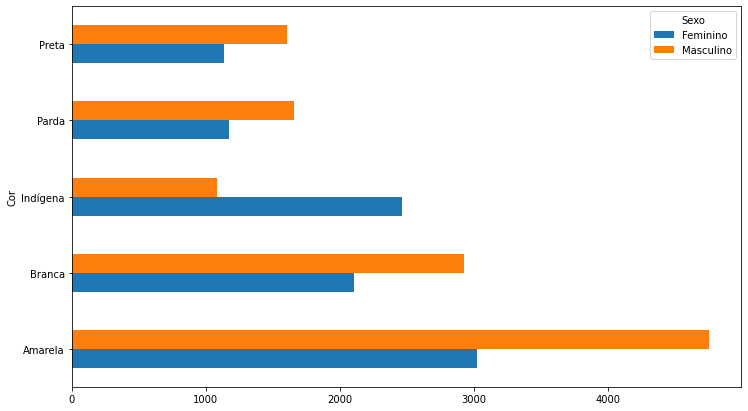

In [48]:
result = pd.pivot_table(dataset, 
                        values = 'Renda', 
                        index = 'Cor', 
                        columns = 'Sexo',
                        aggfunc = np.mean)

result.plot(kind = 'barh', figsize = (12, 7))

In [41]:
pd.pivot_table(dataset, 
               values = 'Renda', 
               index = ['Sexo', 'Cor'], 
               columns = 'Regiao',
               aggfunc = np.mean,
               margins = True,
               margins_name = 'Média Geral')

Regiao                Centro Oeste     Nordeste  ...          Sul  Média Geral
Sexo        Cor                                  ...                          
Feminino    Amarela    3828.714286  1602.222222  ...  3570.625000  3027.341880
            Branca     2650.778000  1553.108497  ...  2040.003657  2109.866750
            Indígena   1264.285714   823.190476  ...  1271.076923  2464.386139
            Parda      1607.729927   970.170858  ...  1247.561151  1176.758516
            Preta      1458.879845   876.036069  ...  1375.374046  1134.596400
Masculino   Amarela    4398.727273  2408.526316  ...  5028.102041  4758.251064
            Branca     3568.725073  1962.819033  ...  2828.849089  2925.744435
            Indígena   1410.400000  1169.158730  ...  1363.800000  1081.710938
            Parda      2409.615830  1249.410510  ...  1823.536900  1659.577425
            Preta      2113.079710  1256.026604  ...  2087.822014  1603.861687
Média Geral            2592.732786  1316.401358  ...  2402.603798  2000.383199

[11 rows x 6 columns]